# Corporate finance

## Part 1

### Profitability ratios

In [2]:
import plotly.graph_objects as go

# Define nodes for the Sankey diagram
nodes = {
    'label': [
        'Total Revenue", "Streaming Revenue', 'DVD Revenue', 'Cost of Revenue', 'Gross Profit',
        'Licensed Content Amortization', 'Produced Content Amortization', 'Other Content Delivery Costs',
        'Marketing Costs', 'Tech & Development', 'General & Admin Costs', 'Operating Profit'
    ],
    'color': [
        'blue', 'lightblue', 'darkblue', 'red', 'green',
        'lightcoral', 'salmon', 'darksalmon',
        'gold', 'goldenrod', 'khaki', 'limegreen'
    ]
}

# Define links (flows) for the Sankey diagram
links = {
    'source': [0, 0, 0, 3, 3, 3, 4, 4, 4, 4],  # Indices correspond to the nodes' labels
    'target': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Indices correspond to the nodes' labels
    'value': [29.7, 0.2, 17.3, 12.4, 8.1, 4.2, 5.1, 2.5, 2.3, 1.4],  # Values corresponding to the flows' magnitude
    'color': [
        'lightblue', 'darkblue', 'grey', 'green',
        'lightcoral', 'salmon', 'darksalmon',
        'gold', 'goldenrod', 'khaki'
    ]
}

# Create the Sankey diagram object
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=nodes['label'],
      color=nodes['color']
    ),
    link=dict(
      source=links['source'],
      target=links['target'],
      value=links['value'],
      color=links['color']
    ))])

fig.update_layout(title_text="The Economics of Netflix - Sankey Diagram", font_size=10)

# Display the figure
fig.show(renderer="browser")

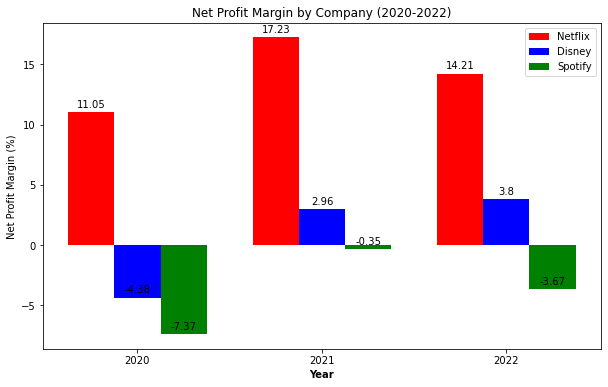

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the companies
companies = ['Netflix', 'Disney', 'Spotify']
years = [2020, 2021, 2022]
netflix_profit_margins = [11.05, 17.23, 14.21]
disney_profit_margins = [-4.38, 2.96, 3.8]
spotify_profit_margins = [-7.37, -0.35, -3.67]

# Set up the bar width and figure size
bar_width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate positions for the bars
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the bars
bars_netflix = ax.bar(r1, netflix_profit_margins, color='red', width=bar_width, label='Netflix')
bars_disney = ax.bar(r2, disney_profit_margins, color='blue', width=bar_width, label='Disney')
bars_spotify = ax.bar(r3, spotify_profit_margins, color='green', width=bar_width, label='Spotify')

# Function to attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to label the heights
autolabel(bars_netflix)
autolabel(bars_disney)
autolabel(bars_spotify)

# Add labels and title
ax.set_xlabel('Year', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(years))])
ax.set_xticklabels(years)
ax.set_ylabel('Net Profit Margin (%)')
ax.set_title('Net Profit Margin by Company (2020-2022)')

# Create legend
ax.legend()

# Show the chart
plt.show()

In [4]:
# Let's correct the radar chart plotting code
import matplotlib.pyplot as plt
import numpy as np

# Define the colors for each company
colors = {
    'Netflix': 'red',
    'Disney': 'blue',
    'Spotify': 'green'
}

# Define the data for the companies (this is an example based on the table provided earlier)
company_data = {
    'Netflix': {
        'Gross Margin': [38.89, 41.64, 39.37],
        'Operating Margin': [18.34, 20.86, 17.82],
        'EBIT Margin': [18.34, 20.82, 17.82],
        'Net Profit Margin': [11.05, 17.23, 14.21]
    },
    'Disney': {
        'Gross Margin': [32.89, 33.06, 34.23],
        'Operating Margin': [5.8, 5.42, 8.18],
        'EBIT Margin': [-1.38, 4.76, 7.09],
        'Net Profit Margin': [-4.38, -2.96, -3.8]
    },
    'Spotify': {
        'Gross Margin': [25.57, 26.79, 24.95],
        'Operating Margin': [-3.72, 0.97, -5.62],
        'EBIT Margin': [-3.72, -0.97, -5.62],
        'Net Profit Margin': [-7.37, -0.35, -3.67]
    }
}

# Function to create a radar chart for each year
def create_radar_chart(data, colors, year_index):
    # Number of variables we're plotting.
    num_vars = len(profitability_metrics)

    # Compute angle each bar is centered on:
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Repeat the first value to close the circle

    # The plot is on a circle, so we need to "complete the loop"
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Draw one axe per variable and add labels
    plt.xticks(angles[:-1], profitability_metrics)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=7)
    plt.ylim(-10, 50)

    # Plot data and fill with color for each company
    for company, metrics in data.items():
        values = [metrics[metric][year_index] for metric in profitability_metrics]
        values += values[:1]  # Repeat the first value to close the circle
        ax.plot(angles, values, color=colors[company], linewidth=2, linestyle='solid', label=company)
        ax.fill(angles, values, color=colors[company], alpha=0.4)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Show the plot
    plt.show()

# Create a radar chart for each year
for i, year in enumerate(years):
    create_radar_chart(company_data, colors, i)


NameError: name 'profitability_metrics' is not defined

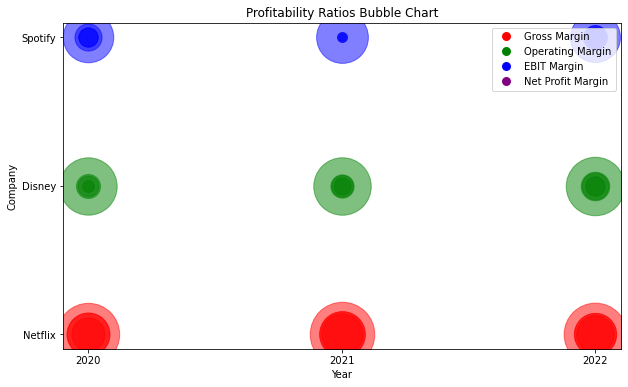

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample data for the bubble chart
years = ['2020', '2021', '2022']
companies = ['Netflix', 'Disney', 'Spotify']
ratios = {
    'Netflix': {'Gross Margin': [38.89, 41.64, 39.37], 'Operating Margin': [18.34, 20.86, 17.82],
                'EBIT Margin': [18.34, 20.82, 17.82], 'Net Profit Margin': [11.05, 17.23, 14.21]},
    'Disney': {'Gross Margin': [32.89, 33.06, 34.23], 'Operating Margin': [5.8, 5.42, 8.18],
               'EBIT Margin': [-1.38, 4.76, 7.09], 'Net Profit Margin': [-4.38, 2.96, 3.8]},
    'Spotify': {'Gross Margin': [25.57, 26.79, 24.95], 'Operating Margin': [-3.72, 0.97, -5.62],
                'EBIT Margin': [-3.72, 0.97, -5.62], 'Net Profit Margin': [-7.37, -0.35, -3.67]}
}

# Create the bubble chart
fig, ax = plt.subplots(figsize=(10, 6))

# Assign a unique color for each company
colors = {'Netflix': 'red', 'Disney': 'green', 'Spotify': 'blue'}
size_scale = 100  # Adjust the scale factor as needed
minimum_size = 50  # Set a minimum size to ensure visibility

for i, year in enumerate(years):
    for company, margins in ratios.items():
        # Calculate the size of the bubble for each margin type
        sizes = [max(abs(margin[i]) * size_scale, minimum_size) for margin in margins.values()]
        # Plot each margin type as a separate bubble
        for j, (margin_type, size) in enumerate(zip(margins.keys(), sizes)):
            ax.scatter(year, company, s=size, alpha=0.5, color=colors[company],
                       label=f'{margin_type} {year}' if i == 0 and company == 'Netflix' else "")

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Company')
ax.set_title('Profitability Ratios Bubble Chart')

# Create a custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Gross Margin', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Operating Margin', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='EBIT Margin', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Net Profit Margin', markerfacecolor='purple', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'float'

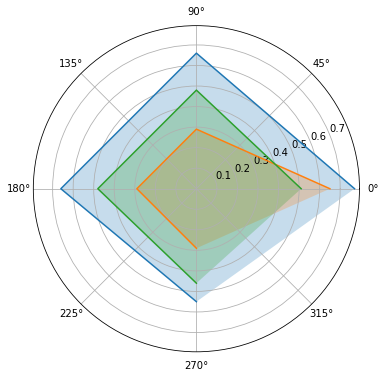

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the radar chart
labels=np.array(['Gross Margin', 'Operating Margin', 'EBIT Margin', 'Net Profit Margin'])

# Each company's ratios per year, normalized to fit within the radar chart scale
data = {
    'Netflix': np.array([[0.77, 0.66, 0.66, 0.55], [0.83, 0.70, 0.70, 0.68], [0.78, 0.64, 0.64, 0.61]]),
    'Disney': np.array([[0.65, 0.29, 0.29, 0.29], [0.66, 0.27, 0.27, 0.35], [0.68, 0.41, 0.41, 0.38]]),
    'Spotify': np.array([[0.51, 0.48, 0.48, 0.46], [0.53, 0.50, 0.50, 0.49], [0.50, 0.47, 0.47, 0.48]])
}

# Create a radar chart for each year
for i, year in enumerate(years):
    fig = plt.figure(figsize=(6, 6))
    radar = fig.add_subplot(111, polar=True)
    for company, ratios in data.items():
        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
        radar.plot(angles, ratios[i], label=company)
        radar.fill(angles, ratios[i], alpha=0.25)

    radar.set_thetagrids(angles * 180/np.pi, labels)
    radar.set_title(f'Radar Chart of Profitability Ratios in {year}')
    radar.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


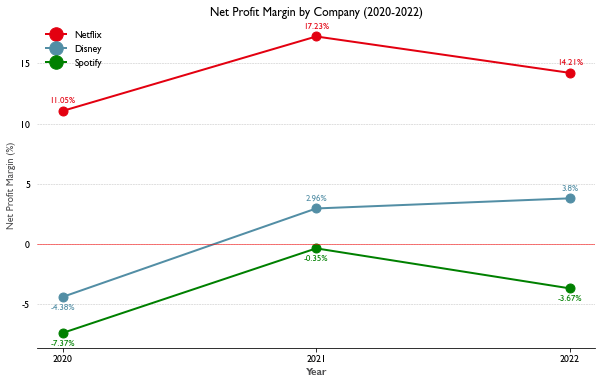

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Activate the Economist style
plt.style.use(r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\theeconomist.mplstyle')

# Define the data for the companies

companies = ['Netflix', 'Disney', 'Spotify']

years = [2020, 2021, 2022]

company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': 'green'}

profit_margins = {

    'Netflix': [11.05, 17.23, 14.21],

    'Disney': [-4.38, 2.96, 3.8],

    'Spotify': [-7.37, -0.35, -3.67]

}



# Create a line chart with the specified company colors

fig, ax = plt.subplots(figsize=(10, 6))



# Plot each company's profit margins with markers

for company, margins in profit_margins.items():

    ax.plot(years, margins, marker='o', linestyle='-', color=company_colors[company], linewidth=2, label=company)

    for (x, y) in zip(years, margins):

        ax.text(x, y + np.sign(y)*0.5, f"{y}%", color=company_colors[company], ha='center', va='bottom' if y > 0 else 'top', fontsize=9)



# Add labels and title

ax.set_xlabel('Year', fontweight='bold')

ax.set_xticks(years)

ax.set_ylabel('Net Profit Margin (%)')

ax.set_title('Net Profit Margin by Company (2020-2022)')

ax.axhline(0, color='red', linewidth=.5, linestyle='-')


# Add grid and legend

ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5)

ax.legend()



# Show the chart

plt.show()

## Liquidity ratios


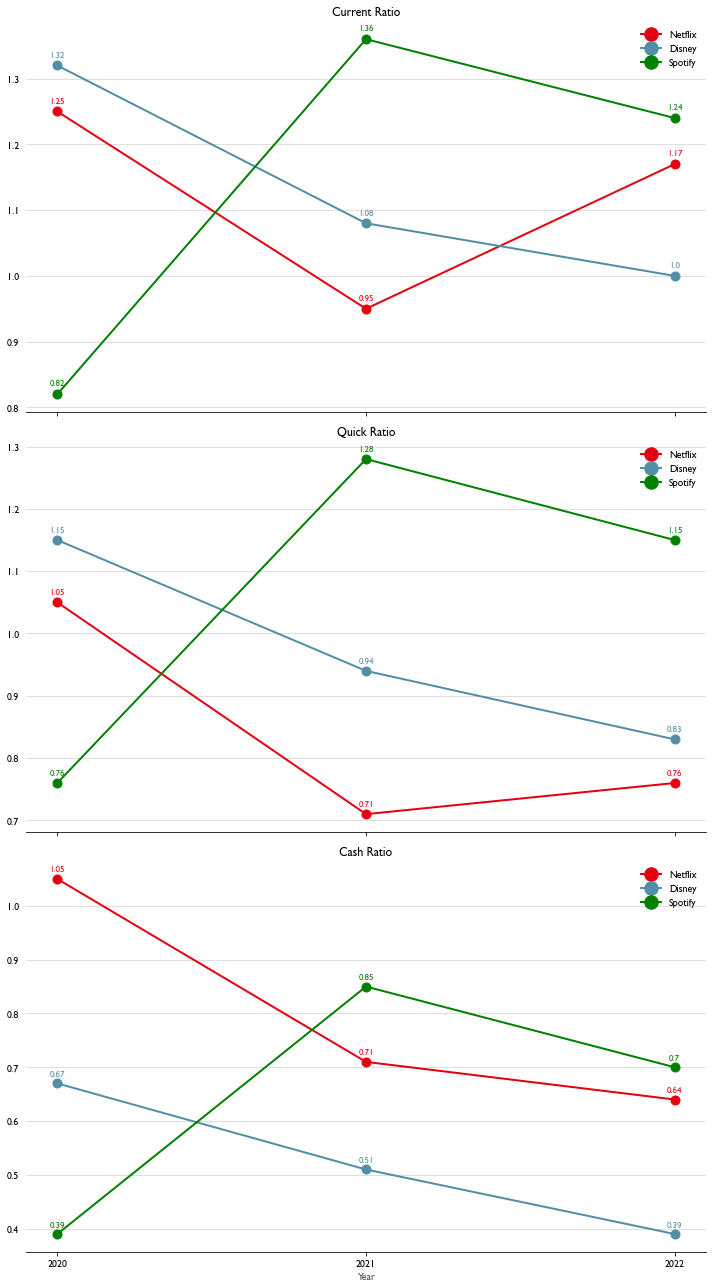

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Activate the Economist style
plt.style.use(r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\theeconomist.mplstyle')

# Define the data for the companies
companies = ['Netflix', 'Disney', 'Spotify']
years = [2020, 2021, 2022]
company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': 'green'}

# Liquidity ratios
liquidity_ratios = {
    'Current Ratio': {'Netflix': [1.25, 0.95, 1.17], 'Disney': [1.32, 1.08, 1.00], 'Spotify': [0.82, 1.36, 1.24]},
    'Quick Ratio': {'Netflix': [1.05, 0.71, 0.76], 'Disney': [1.15, 0.94, 0.83], 'Spotify': [0.76, 1.28, 1.15]},
    'Cash Ratio': {'Netflix': [1.05, 0.71, 0.64], 'Disney': [0.67, 0.51, 0.39], 'Spotify': [0.39, 0.85, 0.70]}
}

# Create a line chart for each liquidity ratio
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

for idx, (ratio, data) in enumerate(liquidity_ratios.items()):
    for company, values in data.items():
        axes[idx].plot(years, values, marker='o', linestyle='-', color=company_colors[company], linewidth=2, label=company)
        for (x, y) in zip(years, values):
            axes[idx].text(x, y + np.sign(y)*0.01, f"{y}", color=company_colors[company], ha='center', va='bottom' if y > 0 else 'top', fontsize=9)
    axes[idx].set_title(f'{ratio}')
    axes[idx].legend()

# Set common labels and adjust layout
plt.xlabel('Year')
plt.xticks(years)
plt.tight_layout()
plt.show()

In [28]:
import os

# Create the output directory if it doesn't exist
output_dir = './output'
os.makedirs(output_dir, exist_ok=True)

# Create a line chart for each liquidity ratio and save them individually
for idx, (ratio, data) in enumerate(liquidity_ratios.items()):
    fig, ax = plt.subplots(figsize=(10, 6))

    for company, values in data.items():
        ax.plot(years, values, marker='o', linestyle='-', color=company_colors[company], linewidth=2, label=company)
        for (x, y) in zip(years, values):
            ax.text(x, y + np.sign(y)*0.01, f"{y}", color=company_colors[company], ha='center', va='bottom' if y > 0 else 'top', fontsize=9)
    
    ax.set_title(f'{ratio}')
    ax.set_xlabel('Year')
    ax.set_xticks(years)
    ax.set_ylabel(ratio)
    ax.legend()

    # Save the figure
    fig.savefig(os.path.join(output_dir, f'{ratio.replace(" ", "_")}.png'))

    # Close the figure after saving to avoid display
    plt.close(fig)

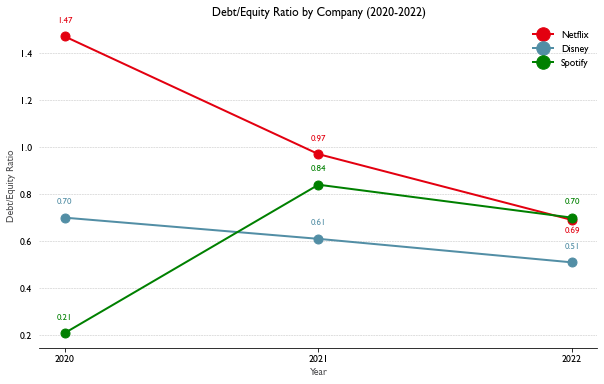

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Activate the Economist style
plt.style.use(r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\theeconomist.mplstyle')

# Data for the companies
# Data for the companies
years = np.array([2020, 2021, 2022])
companies = ['Netflix', 'Disney', 'Spotify']
company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': 'green'}
debt_equity_ratios = {
    'Netflix': np.array([1.47, 0.97, 0.69]),
    'Disney': np.array([0.70, 0.61, 0.51]),
    'Spotify': np.array([0.21, 0.84, 0.70])
}

# Create a line plot for Debt/Equity Ratio
plt.figure(figsize=(10, 6))

# Plot line chart for each company
for company, ratios in debt_equity_ratios.items():
    plt.plot(years, ratios, label=company, color=company_colors[company], marker='o', linestyle='-', linewidth=2)
    # Loop through the data points and display the value
    for i, (x, y) in enumerate(zip(years, ratios)):
        if company == 'Netflix' and x == 2022:
            # Manually adjust the position for Netflix's 2021 data point
            plt.text(x, y - np.sign(y)* 0.061, f"{y:.2f}", color=company_colors[company], ha='center', va='bottom', fontsize=9)
        else:
            plt.text(x, y + np.sign(y) * 0.051, f"{y:.2f}", color=company_colors[company], ha='center', va='bottom', fontsize=9)

# Enhancements for better visualization
plt.title('Debt/Equity Ratio by Company (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Debt/Equity Ratio')
plt.xticks(years)
plt.legend()
plt.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5)

# Show the chart
plt.show()


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Activate the Economist style
plt.style.use(r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\theeconomist.mplstyle')

# Function to create radar charts for each company
def create_radar_chart(data, title, colors):
    # Number of variables we're plotting
    labels = list(data.keys())
    num_vars = len(labels)

    # Compute angle each bar is centered on
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    # Plot size
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for company, color in colors.items():
        values = data[company] + data[company][:1]
        ax.plot(angles, values, color=color, linewidth=2, label=company)
        ax.fill(angles, values, color=color, alpha=0.25)

    # Set the labels for each axis
    ax.set_thetagrids(np.degrees(angles), labels)

    # Title and legend
    plt.title(title, size=15)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Save and show plot
    #plt.savefig(f'./output/{title.replace(" ", "_")}.png')
    plt.show()

# Data for the companies (example values, replace with your actual data)
valuation_data = {
    'Netflix': [1.25, 0.95, 1.17],
    'Disney': [1.32, 1.08, 1.00],
    'Spotify': [0.82, 1.36, 1.24]
}

# Colors for each company
company_colors = {'Netflix': 'red', 'Disney': 'blue', 'Spotify': 'green'}

# Create radar charts for each year
for year in years:
    # Extract the data for the given year
    year_data = {company: data[year] for company, data in valuation_.items()}
    create_radar_chart(year_data, f'Valuation Ratios {year}', company_colors)


NameError: name 'valuation_' is not defined

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Activate the Economist style
plt.style.use(r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\theeconomist.mplstyle')

# Data for the companies
companies = ['Netflix', 'Disney', 'Spotify']
company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': '#f39200'}

# Define the average ratios for each company
average_valuation_ratios = {
    'Netflix': {
        'Market-to-Book Ratio': np.mean([21.589, 16.83, 6.315]),
        'PE Ratio': np.mean([86.51, 52.16, 29.21]),
        'EV/Sales Ratio': np.mean([9.88, 9.30, 4.41]),
        'EV/EBIT Ratio': np.mean([62.26, 41.81, 23.37]),
        'EV/EBITDA Ratio': np.mean([16.59, 14.50, 6.86])
    },
    'Disney': {
        'Market-to-Book Ratio': np.mean([2.509, 3.43, 1.73]),
        'PE Ratio': np.mean([-77.32, 160.32, 54.68]),
        'EV/Sales Ratio': np.mean([4.01, 5.31, 2.52]),
        'EV/EBIT Ratio': np.mean([-388.98, 104.58, 33.27]),
        'EV/EBITDA Ratio': np.mean([56.13, 41.97, 18.25])
    },
    'Spotify': {
        'Market-to-Book Ratio': np.mean([21.18, 24.15, 6.35]),
        'PE Ratio': np.mean([-83.86, -1160.29, -33.32]),
        'EV/Sales Ratio': np.mean([6.03, 2.90, 1.08]),
        'EV/EBIT Ratio': np.mean([238.97, 110.97, -53.20]),
        'EV/EBITDA Ratio': np.mean([-540.40, 80.79, -188.98])
    }
}

# Normalize the data
normalized_ratios = {}
for company, metrics in valuation_ratios.items():
    normalized_metrics = {}
    for metric, values in metrics.items():
        min_val = min(values)
        max_val = max(values)
        # Avoid division by zero in case all values are the same for a metric
        range_val = max_val - min_val if max_val != min_val else 1
        normalized_metrics[metric] = [(val - min_val) / range_val for val in values]
    normalized_ratios[company] = normalized_metrics

# Proceed with radar chart creation using normalized_ratios

# Function to create a radar chart for average valuation ratios
def create_radar_chart(data, colors):
    # Calculate the number of variables
    num_vars = len(data[next(iter(data))])
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Split the circle into even parts
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for company, values in data.items():
        values_list = list(values.values())
        values_list += values_list[:1]  # Complete the loop
        ax.plot(angles, values_list, color=colors[company], linewidth=2, linestyle='solid', label=company)

    ax.set_thetagrids(np.degrees(angles[:-1]), list(data[next(iter(data))].keys()))

    plt.title('Average Valuation Ratios Over 3 Years', size=20)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

# Create the radar chart for average valuation ratios
create_radar_chart(normalized_ratios, company_colors)


NameError: name 'valuation_ratios' is not defined

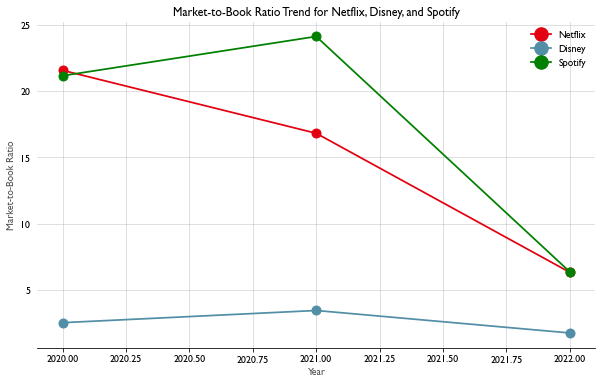

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Economist style path
style_path = r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\theeconomist.mplstyle'
plt.style.use(style_path)

# Data
years = np.array([2020, 2021, 2022])
ratios = {
    'Netflix': {'Market-to-Book Ratio': [21.589, 16.83, 6.315]},
    'Disney': {'Market-to-Book Ratio': [2.509, 3.43, 1.73]},
    'Spotify': {'Market-to-Book Ratio': [21.18, 24.15, 6.35]}
}

company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': 'green'}


# Create line chart for Market-to-Book Ratio
fig, ax = plt.subplots(figsize=(10, 6))
for company, data in ratios.items():
    ax.plot(years, data['Market-to-Book Ratio'], color=company_colors[company], marker='o', linestyle='-', label=company)
    

ax.set_xlabel('Year')
ax.set_ylabel('Market-to-Book Ratio')
ax.set_title('Market-to-Book Ratio Trend for Netflix, Disney, and Spotify')
ax.legend()
ax.grid(True)

# Save the figure
plt.savefig(r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\Market_to_Book_Trend.png')

plt.show()


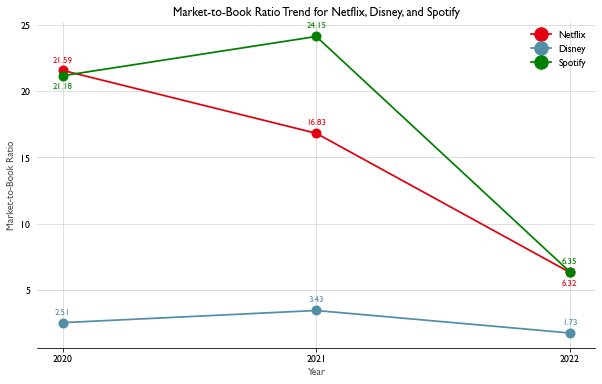

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Economist style path
style_path = r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\theeconomist.mplstyle'
plt.style.use(style_path)

# Data
years = np.array([2020, 2021, 2022])
ratios = {
    'Netflix': {'Market-to-Book Ratio': [21.589, 16.83, 6.315]},
    'Disney': {'Market-to-Book Ratio': [2.509, 3.43, 1.73]},
    'Spotify': {'Market-to-Book Ratio': [21.18, 24.15, 6.35]}
}

company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': 'green'}

# Create line chart for Market-to-Book Ratio
fig, ax = plt.subplots(figsize=(10, 6))
for company, data in ratios.items():
    market_to_book = data['Market-to-Book Ratio']
    ax.plot(years, market_to_book, color=company_colors[company], marker='o', linestyle='-', label=company)
    # Adding value annotations
    for year, value in zip(years, market_to_book):
        if company == 'Netflix' and year == 2022 or company == 'Spotify' and year == 2020:
            # Manually adjust the position for Netflix's 2022 data point
            ax.text(year, value - 0.5, f"{value:.2f}", color=company_colors[company], ha='center', va='top', fontsize=9)
        else:
            ax.text(year, value + .5, f"{value:.2f}", color=company_colors[company], ha='center', va='bottom', fontsize=9)

ax.set_xticks(years)
ax.set_xticklabels(years)

ax.set_xlabel('Year')
ax.set_ylabel('Market-to-Book Ratio')
ax.set_title('Market-to-Book Ratio Trend for Netflix, Disney, and Spotify')
ax.legend()
ax.grid(True)



# save the figure
plt.savefig(r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\Market_to_Book_Trend_11.png')
# Show the chart instead of saving it due to the path issue in this environment
plt.show()


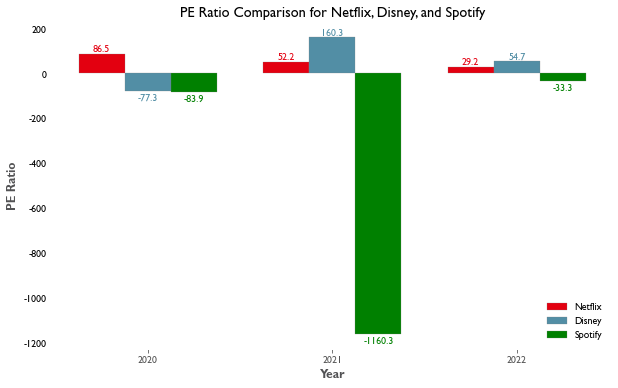

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Economist style path
style_path = 'C:\\Users\\Moham\\Documents\\CORPORATE FINANCE\\fig\\theeconomist.mplstyle'
plt.style.use(style_path)

# Data
years = [2020, 2021, 2022]
pe_ratios = {
    'Netflix': [86.51, 52.16, 29.21],
    'Disney': [-77.32, 160.32, 54.68],
    'Spotify': [-83.86, -1160.29, -33.32]
}
company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': 'green'}

# Create bar chart for PE Ratio
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')  # Set background color to white

# Set position of bar on X axis
bar_width = 0.25
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width * 2 for x in r1]

# Make the plot
netflix_bars = ax.bar(r1, pe_ratios['Netflix'], color=company_colors['Netflix'], width=bar_width, edgecolor='grey', label='Netflix')
disney_bars = ax.bar(r2, pe_ratios['Disney'], color=company_colors['Disney'], width=bar_width, edgecolor='grey', label='Disney')
spotify_bars = ax.bar(r3, pe_ratios['Spotify'], color=company_colors['Spotify'], width=bar_width, edgecolor='grey', label='Spotify')

# Function to add value labels on top of the bars
def add_value_labels(bars, color):
    for bar in bars:
        height = bar.get_height()
        label_position = height + (1 if height > 0 else -10)
        ax.text(bar.get_x() + bar.get_width() / 2, label_position, f'{height:.1f}', color=color,
                ha='center', va='bottom' if height > 0 else 'top')

# Add value labels to the bars
add_value_labels(netflix_bars, company_colors['Netflix'])
add_value_labels(disney_bars, company_colors['Disney'])
add_value_labels(spotify_bars, company_colors['Spotify'])

# Add labels and title
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('PE Ratio', fontweight='bold')
ax.set_title('PE Ratio Comparison for Netflix, Disney, and Spotify')
ax.set_xticks([r + bar_width for r in range(len(r1))])
ax.set_xticklabels(years)

# Create legend at the bottom
ax.legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=1)
ax.grid(True)

# Save the figure
fig.savefig('PE_Ratio_Comparison.png')

plt.show()


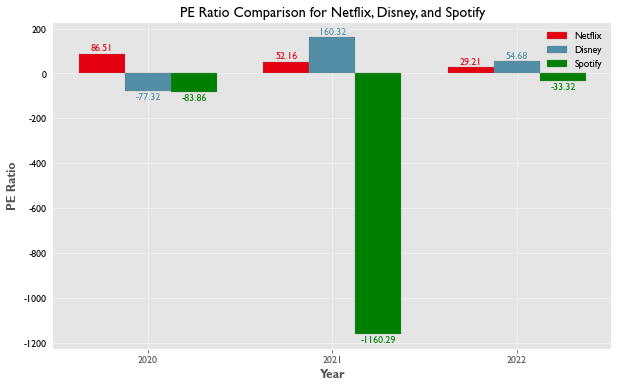

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Economist style path
style_path = 'C:\\Users\\Moham\\Documents\\CORPORATE FINANCE\\fig\\theeconomist.mplstyle'
plt.style.use(style_path)

# Data
years = [2020, 2021, 2022]
pe_ratios = {
    'Netflix': [86.51, 52.16, 29.21],
    'Disney': [-77.32, 160.32, 54.68],
    'Spotify': [-83.86, -1160.29, -33.32]
}
company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': 'green'}

# Create bar chart for PE Ratio
fig, ax = plt.subplots(figsize=(10, 6))

# Set position of bar on X axis
bar_width = 0.25
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width * 2 for x in r1]

# Make the plot
netflix_bars = ax.bar(r1, pe_ratios['Netflix'], color=company_colors['Netflix'], width=bar_width, edgecolor='grey', label='Netflix')
disney_bars = ax.bar(r2, pe_ratios['Disney'], color=company_colors['Disney'], width=bar_width, edgecolor='grey', label='Disney')
spotify_bars = ax.bar(r3, pe_ratios['Spotify'], color=company_colors['Spotify'], width=bar_width, edgecolor='grey', label='Spotify')

# Add labels and title
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('PE Ratio', fontweight='bold')
ax.set_title('PE Ratio Comparison for Netflix, Disney, and Spotify')
ax.set_xticks([r + bar_width for r in range(len(r1))])
ax.set_xticklabels(years)

# Adding values above the bars
def add_values_on_bars(bars, color):
    for bar in bars:
        y_value = bar.get_height()
        text = f'{y_value:.2f}'
        text_position = y_value + (abs(y_value) / y_value) * 5  # Adjust 5 for spacing
        ax.text(bar.get_x() + bar.get_width() / 2, text_position, text, ha='center', va='bottom' if y_value > 0 else 'top', color=color)

# Call the function to add values on bars
add_values_on_bars(netflix_bars, company_colors['Netflix'])
add_values_on_bars(disney_bars, company_colors['Disney'])
add_values_on_bars(spotify_bars, company_colors['Spotify'])

# Create legend & Show graphic
ax.legend()
ax.grid(True)

# Show the chart instead of saving it due to the path issue in this environment
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the Economist style is already set by the mplstyle file as before

# Data for the companies
years = np.array([2020, 2021, 2022])
companies = ['Netflix', 'Disney', 'Spotify']
company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': '#1DB954'}

# Define the ratios for each company for each year
ev_sales_ratios = {
    'Netflix': [9.88, 9.30, 4.41],
    'Disney': [4.01, 5.31, 2.52],
    'Spotify': [6.03, 2.90, 1.08]
}

ev_ebitda_ratios = {
    'Netflix': [16.59, 14.50, 6.86],
    'Disney': [56.13, 41.97, 18.25],
    'Spotify': [-540.40, 80.79, -188.98]
}

# Create a line chart for EV/Sales and EV/EBITDA Ratios
fig, ax = plt.subplots(figsize=(10, 6))

# Plot EV/Sales Ratios with a solid line
for company, ratios in ev_sales_ratios.items():
    ax.plot(years, ratios, color=company_colors[company], marker='o', linestyle='-', label=f'{company} EV/Sales')



# Add labels and title
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Ratios', fontweight='bold')
ax.set_title('EV/Sales Ratios Comparison')
ax.set_xticks(years)
ax.legend()

# Show grid and plot
ax.grid(True)
plt.show()


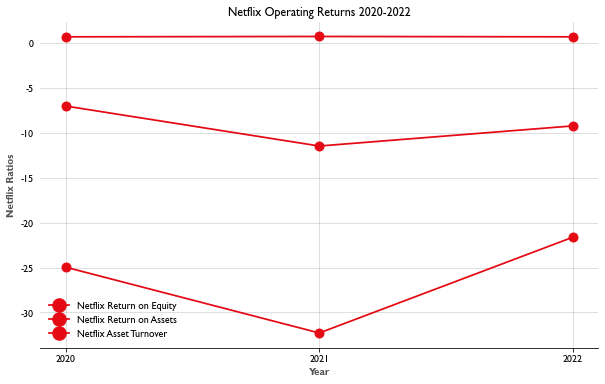

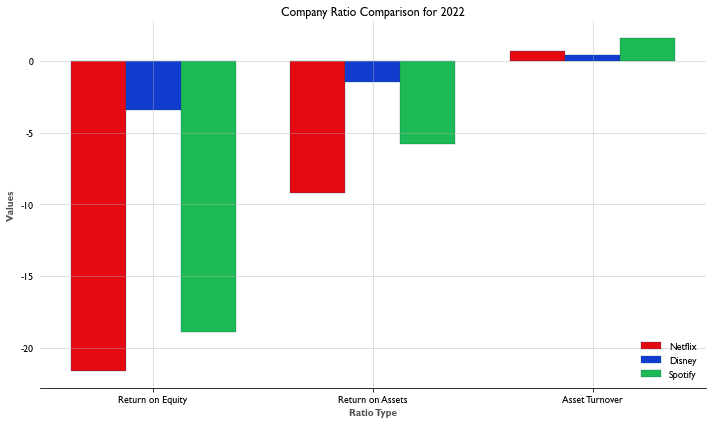

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the companies
years = np.array([2020, 2021, 2022])
companies = ['Netflix', 'Disney', 'Spotify']
company_colors = {'Netflix': '#E50914', 'Disney': '#113CCF', 'Spotify': '#1DB954'}

# Define the ratios for each company for each year
netflix_ratios = {
    'Return on Equity': [-24.96, -32.28, -21.62],
    'Return on Assets': [-7.03, -11.48, -9.24],
    'Asset Turnover': [0.67, 0.71, 0.67]
}

disney_ratios = {
    'Return on Equity': [-3.30, -2.30, -3.40],
    'Return on Assets': [-1.40, -1.00, -1.50],
    'Asset Turnover': [0.32, 0.33, 0.41]
}

spotify_ratios = {
    'Return on Equity': [-24.70, -1.30, -18.90],
    'Return on Assets': [-10.30, -0.50, -5.80],
    'Asset Turnover': [1.39, 1.30, 1.58]
}

# Create a line chart for Netflix's ratios over the years
fig, ax1 = plt.subplots(figsize=(10, 6))

for ratio_name in netflix_ratios.keys():
    ax1.plot(years, netflix_ratios[ratio_name], color=company_colors['Netflix'], marker='o', linestyle='-', label=f'Netflix {ratio_name}')

ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Netflix Ratios', fontweight='bold')
ax1.set_title('Netflix Operating Returns 2020-2022')
ax1.set_xticks(years)
ax1.legend()
ax1.grid(True)

# Create a clustered bar chart for the year 2022 comparing all companies
ratios_2022 = ['Return on Equity', 'Return on Assets', 'Asset Turnover']
n_ratios = len(ratios_2022)
index = np.arange(n_ratios)
bar_width = 0.25

fig, ax2 = plt.subplots(figsize=(10, 6))
bar_positions = index - bar_width, index, index + bar_width

for i, company in enumerate(companies):
    ratios = [netflix_ratios, disney_ratios, spotify_ratios][i]
    ax2.bar(bar_positions[i], [ratios[ratio][2] for ratio in ratios_2022], bar_width, color=company_colors[company], label=company)

ax2.set_xlabel('Ratio Type', fontweight='bold')
ax2.set_ylabel('Values', fontweight='bold')
ax2.set_title('Company Ratio Comparison for 2022')
ax2.set_xticks(index)
ax2.set_xticklabels(ratios_2022)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


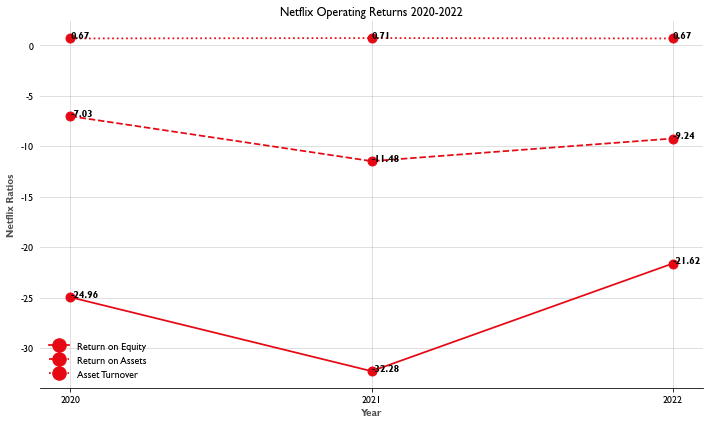

In [18]:
# Adding the data values to the chart

# Create a line chart for Netflix's ratios over the years with the specific Netflix red color and different line styles
fig, ax = plt.subplots(figsize=(10, 6))
netflix_color = '#E50914'
for ratio_name, style in zip(netflix_ratios.keys(), ['-', '--', ':']):
    ax.plot(years, netflix_ratios[ratio_name], color=netflix_color, marker='o', linestyle=style, label=f'{ratio_name}')
    # Adding the data values next to each point
    for (x, y) in zip(years, netflix_ratios[ratio_name]):
        ax.text(x, y, f'{y:.2f}', fontweight='bold')

ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Netflix Ratios', fontweight='bold')
ax.set_title('Netflix Operating Returns 2020-2022')
ax.set_xticks(years)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


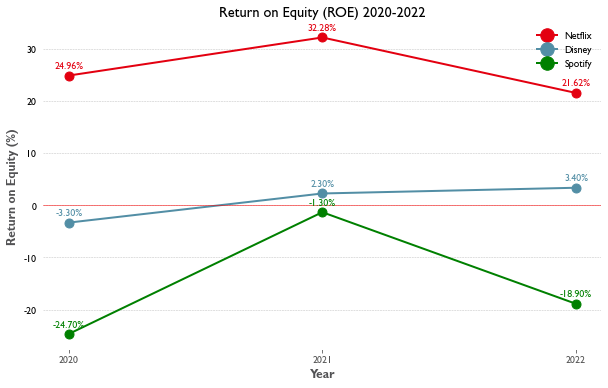

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Economist style path
style_path = r'C:\Users\Moham\Documents\CORPORATE FINANCE\fig\theeconomist.mplstyle'
plt.style.use(style_path)

# Data for the companies
years = np.array([2020, 2021, 2022])
companies = ['Netflix', 'Disney', 'Spotify']
company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': 'green'}

# Define the ROE for each company for each year
netflix_roe = np.array([24.96, 32.28, 21.62])
disney_roe = np.array([-3.30, 2.30, 3.40])
spotify_roe = np.array([-24.70, -1.30, -18.90])

# Create the line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')  # Set the background color to white

# Plotting the line chart for each company
for company, roe in zip(companies, [netflix_roe, disney_roe, spotify_roe]):
    ax.plot(years, roe, marker='o', linestyle='-', color=company_colors[company], linewidth=2, label=company)
    for x, y in zip(years, roe):
        ax.text(x, y +1, f'{y:.2f}%', color=company_colors[company], ha='center', va='bottom' )

# Customize the chart
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Return on Equity (%)', fontweight='bold')
ax.set_title('Return on Equity (ROE) 2020-2022')
ax.legend()
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5)
ax.axhline(0, color='red', linewidth=.5, linestyle='-')
ax.set_xticks(years)

# save the figure
fig.savefig('ROE_Comparison.png')

plt.show()


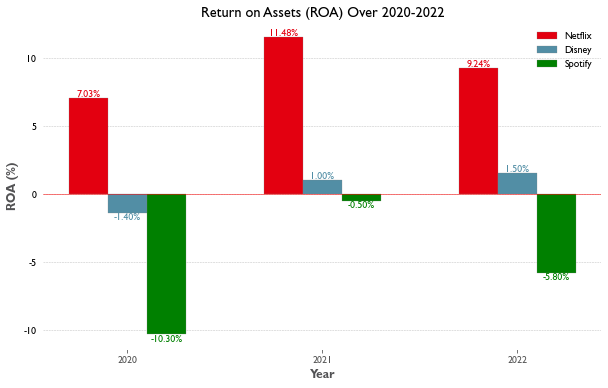

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Economist style path
style_path = 'C:\\Users\\Moham\\Documents\\CORPORATE FINANCE\\fig\\theeconomist.mplstyle'
plt.style.use(style_path)

# Data for ROA for each company over three years
roa = {
    'Netflix': [7.03, 11.48, 9.24],
    'Disney': [-1.40, 1.00, 1.50],
    'Spotify': [-10.30, -0.50, -5.80]
}
companies = ['Netflix', 'Disney', 'Spotify']
company_colors = {'Netflix': '#E30010', 'Disney': '#528EA5', 'Spotify': 'green'}
years = [2020, 2021, 2022]

# Create bar chart for ROA
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')  # Set background color to white

# Set position of bar on X axis
bar_width = 0.2
r = np.arange(len(years))

# Make the plot for each company
for i, company in enumerate(companies):
    ax.bar(r + bar_width*i, roa[company], color=company_colors[company], width=bar_width, edgecolor='grey', label=company)

    # Add value labels
    for year, value in zip(r + bar_width*i, roa[company]):
        ax.text(year, value, f'{value:.2f}%', ha='center', va='bottom' if value > 0 else 'top', color=company_colors[company])

# Customize the chart
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('ROA (%)', fontweight='bold')
ax.set_title('Return on Assets (ROA) Over 2020-2022')
ax.set_xticks(r + bar_width)
ax.set_xticklabels(years)
ax.legend()
ax.grid(True, which='major', axis='y', color='gray', linestyle='--', linewidth=0.5)
ax.axhline(0, color='red', linewidth=.5, linestyle='-')

# Save the figure
plt.savefig('ROA_Comparison.png')

plt.show()
